In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [57]:
data = pd.read_csv('house_features.csv')

data = data[data.apply(lambda row: len(row) == 8, axis=1)]

data = data[data['Address'].notnull()]

data['Area'] = pd.to_numeric(data['Area'], errors='coerce')

data = data[data['Area'] < 1000]

data.to_csv('cleaned_dataset.csv', index=False)

cleaned_data_set = pd.read_csv('cleaned_dataset.csv')
cleaned_data_set.describe()

,Area,Room,Price,Price(USD)
count,3450.000000,3450.000000,3.450000e+03,3.450000e+03
mean,106.917391,2.081159,5.375563e+09,1.791854e+05
std,69.550976,0.760216,8.125918e+09,2.708639e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.419250e+09,4.730833e+04
50%,90.000000,2.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,9.240000e+10,3.080000e+06


In [58]:
df = pd.read_csv('cleaned_dataset.csv')
df.describe

<bound method NDFrame.describe of        Area  Room  Parking  Warehouse  Elevator             Address   
0      63.0     1     True       True      True             Shahran  \
1      60.0     1     True       True      True             Shahran   
2      79.0     2     True       True      True              Pardis   
3      95.0     2     True       True      True       Shahrake Qods   
4     123.0     2     True       True      True      Shahrake Gharb   
...     ...   ...      ...        ...       ...                 ...   
3445   86.0     2     True       True      True  Southern Janatabad   
3446   83.0     2     True       True      True            Niavaran   
3447   75.0     2    False      False     False              Parand   
3448  105.0     2     True       True      True              Dorous   
3449   82.0     2    False       True      True              Parand   

             Price  Price(USD)  
0     1.850000e+09    61666.67  
1     1.850000e+09    61666.67  
2     5.500000

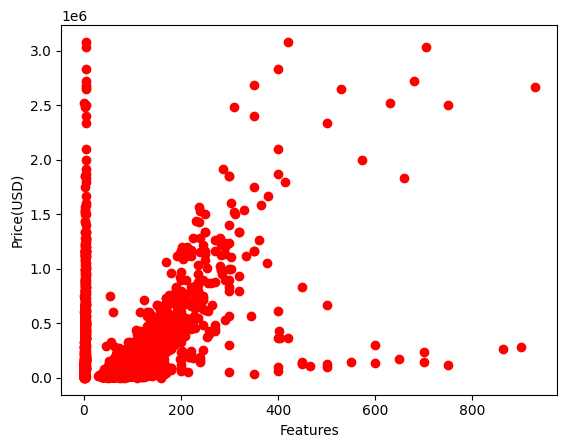

In [59]:
x_data = df[['Area', 'Room']]
y_data = df[['Price(USD)']]
plt.plot(x_data, y_data, 'ro')
plt.xlabel('Features')
plt.ylabel('Price(USD)')
plt.show()